In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data = pd.read_csv('../census.csv')

# Explorando os Dados

In [81]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
data.shape

(32561, 15)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
data.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [85]:
data.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Transformacao dos dados

In [86]:
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
previsores = data.iloc[:, 0:14].values
base = data.iloc[:, 14:].values

In [104]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [105]:
lb_previsores = LabelEncoder()
for i in range(1, 14):
    previsores[:, i] = lb_previsores.fit_transform(previsores[:, i])

In [106]:
# enc = OneHotEncoder(categories=[1, 3, 5, 6, 7, 8, 9, 13])
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [1, 3, 5, 6, 7, 8, 9, 13])]
)
previsores = ct.fit_transform(previsores).toarray()

In [107]:
previsores.shape

(32561, 102)

In [108]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

## Dividindo os dados

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(previsores, base, test_size=0.25, random_state=42)

## Treinamento do Modelo de KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

C:\Users\Makson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [112]:
y_pred = clf.predict(X_test)

## Verificando metricas e matriz de confusao

In [113]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(f'A acuracia e de {accuracy * 100:.2f}%')

A acuracia e de 81.70%


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      6214
        >50K       0.64      0.51      0.57      1927

    accuracy                           0.82      8141
   macro avg       0.75      0.71      0.73      8141
weighted avg       0.81      0.82      0.81      8141



In [121]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5676  538]
 [ 952  975]]


<Figure size 720x504 with 0 Axes>

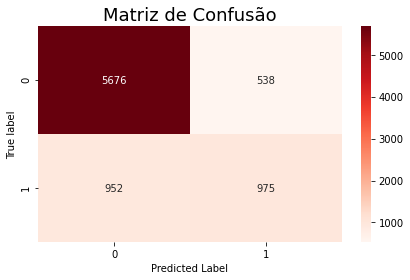

In [122]:
plt.figure(figsize = (10,7))
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d', cmap='Reds')

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()